In [3]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [26]:
from PIL import Image

In [5]:
def list_files_local(path):
    """ Get file list form local folder. """
    from glob import glob
    return glob(path)

## What is RGB?? 

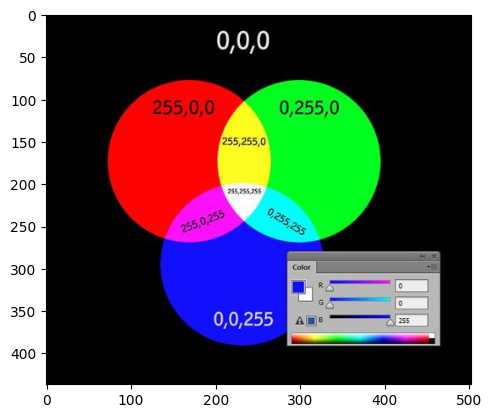

In [28]:
### display an image 
img = Image.open('RGB.jpg') 
plt.imshow(img)

### first, let's just display an image: 

C:\Users\annav\AppData\Local\Temp\ipykernel_28496\797911817.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imageio.imread('BChristy.jpg')


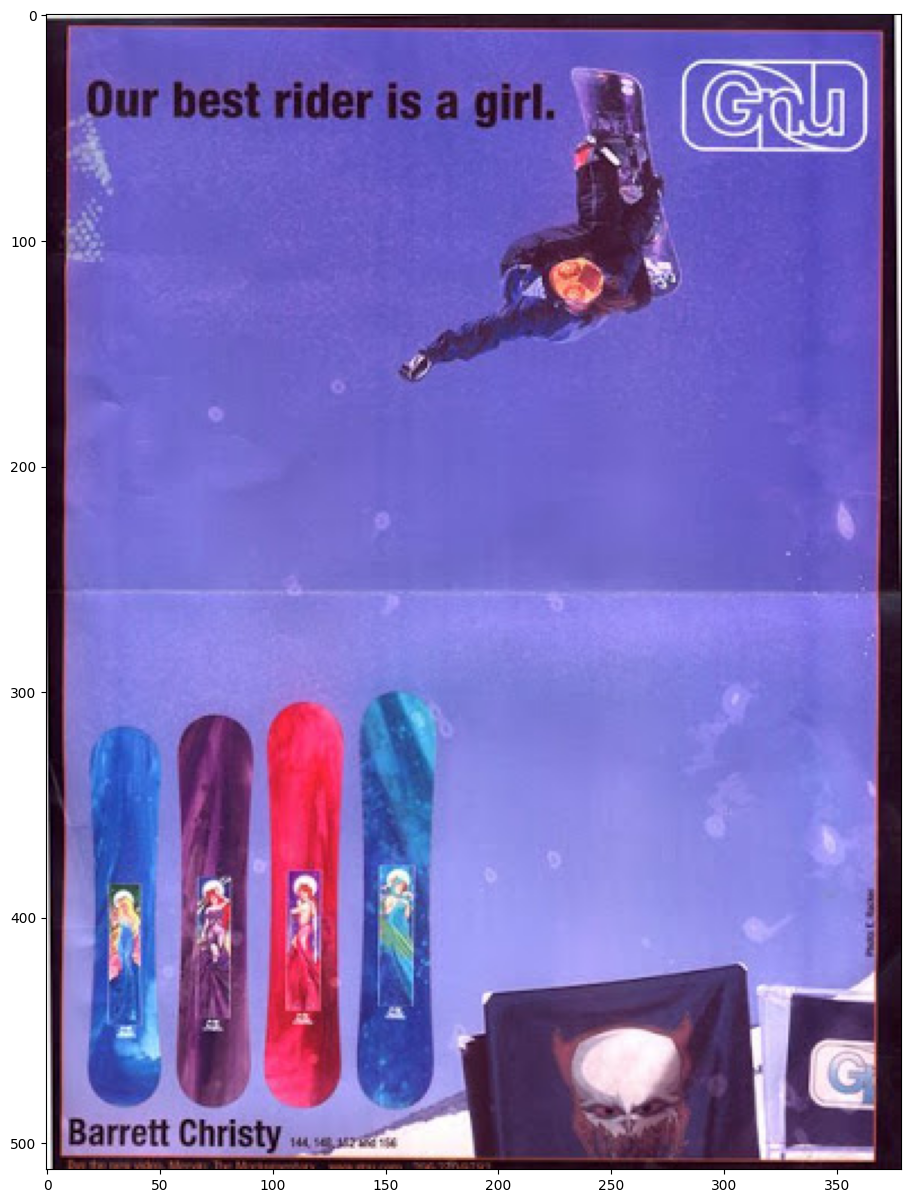

In [21]:
pic = imageio.imread('BChristy.jpg')
plt.figure(figsize = (15,15))

plt.imshow(pic)

### What the heck is RGB? 

In [22]:
### let's make arrays for R, G, and B: 
RED = pic[ : , : , 0] /255
BLUE = pic[ : , : , 1] /255
GREEN = pic[ : , : , 2] /255

## okay, and split them into different channels: 
### what do you notice?? what is that red snowboard doing?

In [32]:
def rgb_split(pic):
    fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

    for c, ax in zip(range(3), ax):

        # create zero matrix
        split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'

        # assing each channel 
        split_img[ :, :, c] = pic[ :, :, c]

        # display each channel
        ax.imshow(split_img)


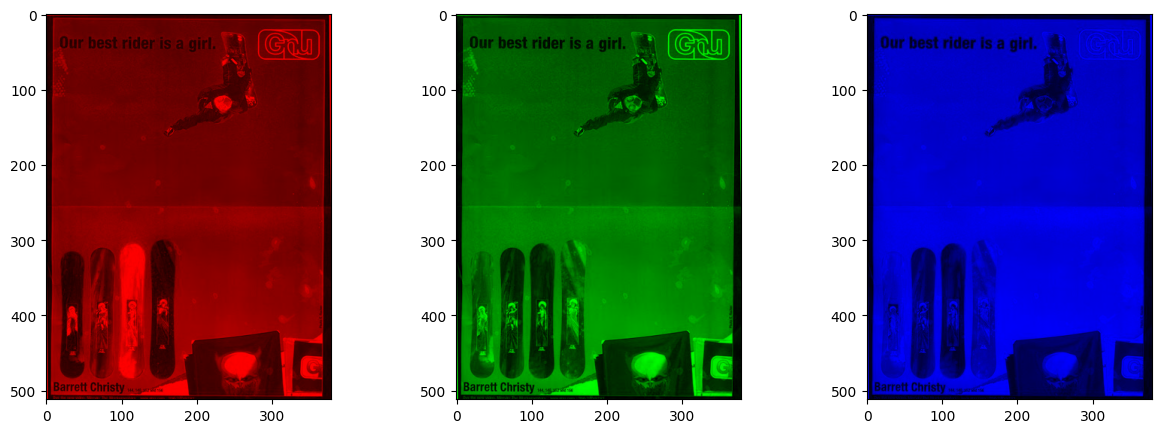

In [33]:
rgb_split(pic)

## A color histogram: a lot of blue in the image?

In [34]:
### how to evaluate the intensity of blue? 
# tuple to select colors of each channel line
def color_histogram(pic):
    colors = ("red", "green", "blue")

    # create the histogram plot, with three lines, one for
    # each color
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            pic[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)

    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")

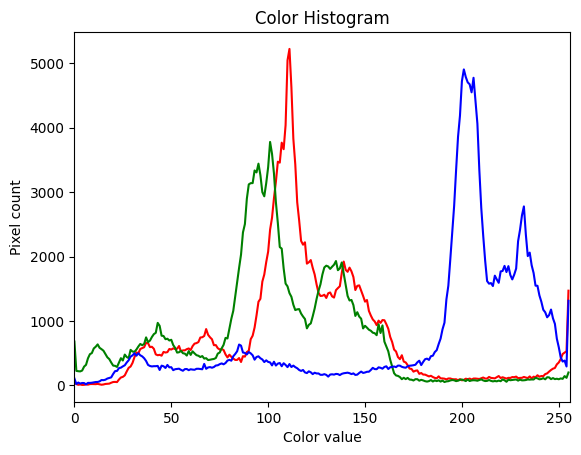

In [35]:
color_histogram(pic)

### Okay, now you try upload a photo, then let's see what colors it is made of: 

In [30]:
my_image = 'your_image_name_here.jpg'

In [ ]:
pic = imageio.imread(my_image)
plt.figure(figsize = (15,15))

plt.imshow(pic)

In [ ]:
### RGB split images
rgb_split(pic)

In [ ]:
#### Color histogram
color_histogram(pic)

### ADD-IN: Why is this useful for environmental data proccessing? 

## ADD-IN: What is Albedo? why is it important?

### Our snow data! 

In [6]:
snow_pics1 = list_files_local('snow_day1/*')
snow_pics2 = list_files_local('snow_day2/*')

In [4]:
pic = 'snow_jpgs/snow1.2.jpg'

In [7]:
snow_pics1

['snow_day1\\snow2.jpg',
 'snow_day1\\snow3.jpg',
 'snow_day1\\snow4.jpg',
 'snow_day1\\snow5.jpg',
 'snow_day1\\snow6.jpg']

In [9]:
### go through and for each find the luminance: 
def function(picture_list):
    blue_list = []
    lum_list = []
    for img in picture_list: 
        pic = imageio.imread(img)

        ### let's make arrays for R, G, and B: 
        RED = pic[ : , : , 0] /255
        BLUE = pic[ : , : , 1] /255
        GREEN = pic[ : , : , 2] /255

        LUMINANCE = (0.2126*RED + 0.7152*GREEN + 0.0722*BLUE)

        lum = np.asarray(LUMINANCE)
        blu = np.asarray(BLUE)
        L_value =np.sum(lum)
        blueness = np.sum(blu)

        lum_list.append(L_value / (pic.shape[0]*pic.shape[1]))
        blue_list.append(blueness/ (pic.shape[0]*pic.shape[1])) 
        
    return lum_list, blue_list

In [10]:
## call our function: 

### day 1:
luminance_day1, blue_day1 = function(snow_pics1)

### day 2:
luminance_day2, blue_day2 = function(snow_pics2)

C:\Users\annav\AppData\Local\Temp\ipykernel_28496\1513347442.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imageio.imread(img)


In [11]:
### albedo array: 
albedo_day1 = [ 0.27, 0.1, 0.22, 0.11, 0.06]
albedo_day2 = [0.28, 0.31, 0.25, 0.09, 0.11, 0.11, 0.09, 0.15]

### plotting: 

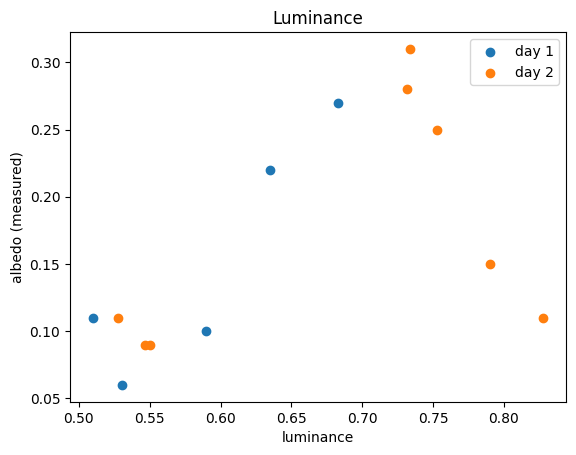

In [13]:
### let's plot our luminance: 
plt.scatter(luminance_day1, albedo_day1, label= 'day 1')
plt.scatter(luminance_day2, albedo_day2, label= 'day 2')
plt.title("Luminance")
plt.xlabel("luminance")
plt.ylabel("albedo (measured)")
plt.legend()

### plotting "blueness"!

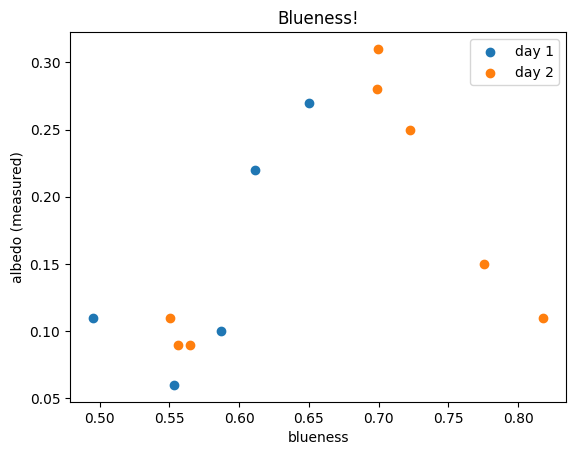

In [14]:
plt.scatter(blue_day1, albedo_day1, label= 'day 1')
plt.scatter(blue_day2, albedo_day2, label= 'day 2')
plt.title("Blueness!")
plt.xlabel("blueness")
plt.ylabel("albedo (measured)")
plt.legend()

### Introduce what students measured at point 660, and why albedo might not capture this? 

In [18]:
### how does this compare to the data students collected?
particles_day1 = [9.7,23.4, 5.6, 5.9,465.2 ] 
particles_day2 = [ 0.2, 0.4, 0.4, 0.8, 19.0, 4.4, 274.1, 1.3]

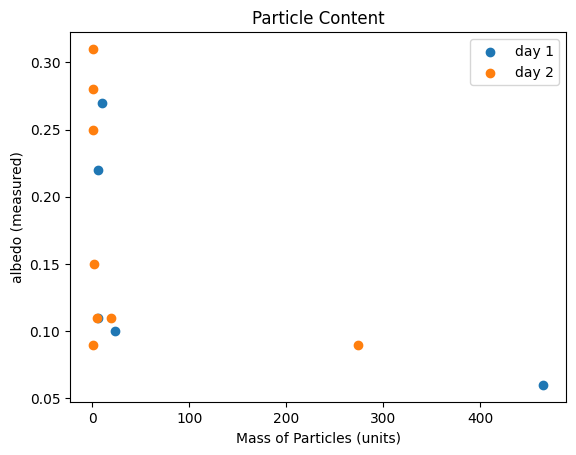

In [20]:
plt.scatter(particles_day1, albedo_day1, label= 'day 1')
plt.scatter(particles_day2, albedo_day2, label= 'day 2')
plt.title("Particle Content")
plt.xlabel("Mass of Particles (units)")
plt.ylabel("albedo (measured)")
plt.legend()